<a href="https://colab.research.google.com/github/FMurunga/TMDB-Movies-Data-Investigation-Project/blob/main/TDMb_Dataset_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>
This is movie data from the Movie database(TMDb) that contains over 10,000 records an 21 columns.<br/>
The dataset contains columns the following columns:

  id : movie id                  
  imdb_id: contains the movie id as in IDMB database             
  popularity: shows the movie rating            
  budget: shows the expenses incurrred in production                
  revenue: shows the revenue generated after movie releases              
  original_title: describes the movie's original title       
  cast: shows the movie's cast                
  homepage: movies webpage              
  director: the movie directors involved in production              
  tagline : movie taglines              
  keywords  : keywords used to identify the movies            
  overview  : shows he general descript             
  runtime : shows how long a movie is               
  genres : the different genres the movies belong to               
  production_companies  : the companies involved in the movie's production
  release_date  : tthe date the movie was released        
  vote_count  : the count of the votes that deyermined the movie's popularity           
  vote_average   :       
  release_year  : the year the movie was released          
  budget_adj: budget adjustments as per the inflation rates in terms of the 2010 dollars           
  revenue_adj : revenue adjustments as per the inflation rates in terms of the 2010 dollars 
  <br/>       

### Question(s) for Analysis
<ol>
    <li> What is the average runtime for most movies? and What was the highest revenue generated?</li>
    <li> Which genre of movies are the most produced?</li>
    <li> Which production companies produced the most movies?</li>
    <li> Which director directed most movies?</li>
    <li> Which actor was casted the most movies?</li>
    <li> which month had the highest number of movie releases?</li>
    <li>Does a Movies' Popularity affects its revenue?</li>
    <li> Which decade had the most movie releases?</li>
    <li> Did most movies have higher ratings and votes?</li>
    <li> What was the highest profits made?</li>
  <ol/>

In [1]:
#import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#load the idmb CSV file into a pandas dataframe
#The file is on my github repository
df = pd.read_csv('https://raw.github.com/FMurunga/TMDB-Movies-Data-Investigation-Project/main/tmdb-movies.csv',delimiter=',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#Check the shape of the dataframe
df.shape

(10866, 21)

The dataset has 10,866 rows and 21 columns

In [4]:
#check the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the information above the following can be observed:
<ul>
 <li>Columns such as: idmbId,cast, homepage,director,tagline,keywords,,overview,runtime,genres,production_companies have missing values</li>
<li>The datatypes of each column: most values in the dataset have object attributes and a few have float and integer data types</li>
<li> The release_date column is an object data type<li/>
<ul/>






idmbId,cast, homepage,director,tagline,keywords,,overview,runtime,genres,production_companies have missing values<br/>
Note: **Most of these columns might not be useful in our analysis and thus can be dropped**

In [5]:
#cchecking for Unique values to determine the analysis apprroach of the categocial values in this dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Most of the categorical values have too many distinct values thus can be analysed individually 

In [6]:
#checking for null values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Correlation between features check
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


The id column has a negative correlation with all features therefore it can be dropped
<ul>
<li> budget has a high correlation with revenue</li>
<li> revenue has a high correlation with budget, popularity,vot_count, revenue_adj and budget_adj</li>
<li> runtime does not have a high correlation with any of the other features</li>popularity 


### Data Cleaning

In [8]:
#converting the release_date column from object type to date column
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
#dropping some columns
df=df.drop(['imdb_id','id','original_title','homepage','tagline','keywords','overview'], axis=1)
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [10]:
#Removing the pipe symbol on the genres column
genres_conc = df['genres'].str.cat(sep='|')
genres_conc

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Crime|Drama|Mystery|Adventure|Animation|Co

In [11]:
genres =pd.Series(genres_conc.split(sep='|'))

genres

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
26955            Mystery
26956             Comedy
26957             Action
26958             Comedy
26959             Horror
Length: 26960, dtype: object

In [12]:
#removing the pipe(|) symbol on the production companies
def Production_Companies(x):
          #concatenate production companies into one string
    companies_conc =df['production_companies'].str.cat(sep='|')

          #breakdown the production companies string into single rows
    companies =pd.Series(companies_conc.split('|'))
    #companies=companies.value_counts(ascending=False)
    return(companies)

In [13]:
x= Production_Companies(df)
x

0                  Universal Studios
1               Amblin Entertainment
2                 Legendary Pictures
3            Fuji Television Network
4                             Dentsu
                    ...             
23222               Joel Productions
23223    Douglas & Lewis Productions
23224                        Mosfilm
23225        Benedict Pictures Corp.
23226                      Norm-Iris
Length: 23227, dtype: object

In [14]:
#removing the pipe(|) symbol from the directors column
def Directors(x):
          #concatenate movie directors into one string
    directors =df['director'].str.cat(sep='|')

          #breakdown the directors string into single rows
    movie_directors =pd.Series(directors.split('|'))
    #movie_directors =movie_directors.value_counts(ascending=False)
    return(movie_directors)

In [15]:
Directors(df)

0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
11887           Bruce Brown
11888    John Frankenheimer
11889        Eldar Ryazanov
11890           Woody Allen
11891      Harold P. Warren
Length: 11892, dtype: object

In [16]:
#removing the pipe(|) symbol from the cast column

def Movie_Cast(x):
          #concatenate movie directors into one string
    cast =df['cast'].str.cat(sep='|')

          #breakdown the directors string into single rows
    movie_cast =pd.Series(cast.split('|'))
    #movie_cast=movie_cast.value_counts(ascending=False)
    return(movie_cast)

In [17]:
Movie_Cast(df)

0                Chris Pratt
1        Bryce Dallas Howard
2                Irrfan Khan
3          Vincent D'Onofrio
4              Nick Robinson
                ...         
52568       Harold P. Warren
52569             Tom Neyman
52570          John Reynolds
52571           Diane Mahree
52572      Stephanie Nielson
Length: 52573, dtype: object

Exploratory Data Analysis


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What is the average movie runtime?

In [18]:
#statistical information about the dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Answer: The average movie runtime is 102

**From the above stastical information the following  can be identified about the dataset:**
<ol>
<li> The movies with the highest budget was 425,000,000</li>
<li> The movie with the highest revenue was 2,781,506,000 </li>
<li>The latest movie release year is 2015 and the earliest  movie release was in 1960</li>
<li>movie with the longest runtime was 900</li>
<li>The movie with the highest rating  had a 9.2 rating, the lowest rating was a 1.5 and the average movie rating was a 5.5</li>
<li>The movie with the highest vote count had 9767 votes while the lowest had at least 10 votes.</li>
<li>The most popular movie had a 32 and the least popular movie had at least a 0 </li>

</ol>










### Research Question 2: Which genre of movies are the most produced?

In [44]:
#Get the genres movie counts
Genre_conc =df['genres'].str.cat(sep='|')
Genres =pd.Series(Genre_conc.split('|'))
Genres.value_counts(ascending=False)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

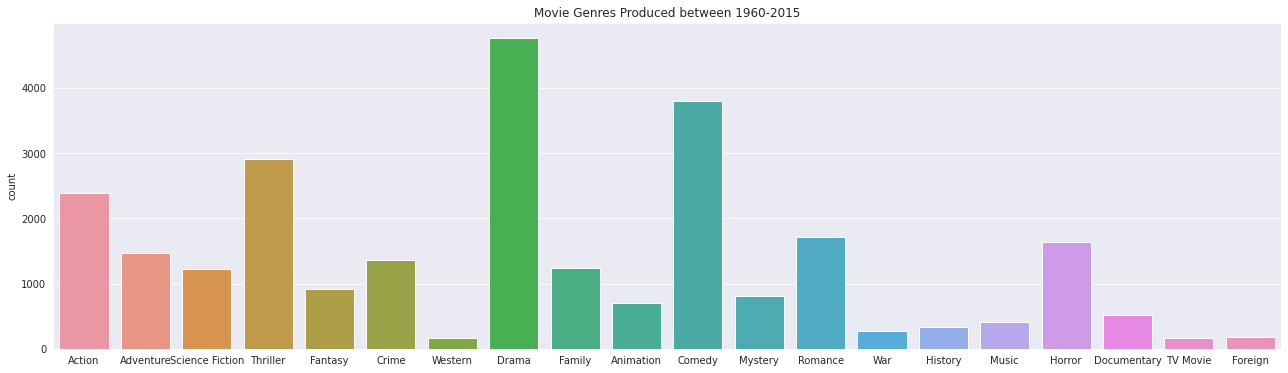

In [45]:
#countplot for movie genres

fig, ax = plt.subplots(figsize=(22, 6))
sns.countplot(x=Genres,ax=ax).set(title='Movie Genres Produced between 1960-2015')
plt.show()

Answer: Dramas were the most produced genres while TV movies,Foreign and Western genres had the lowest production

---

### Research Question 3:Which production companies produced the most movies?

In [22]:
#get the indivudual production companies and movies produced
def Production_Companies_count(x):
          #concatenate production companies into one string
    companies_conc =df['production_companies'].str.cat(sep='|')

          #breakdown the production companies string into single rows
    companies =pd.Series(companies_conc.split('|'))
    companies=companies.value_counts(ascending=False)
    return(companies)

In [23]:
#count of movies produced by individual production companies
prod_companies = Production_Companies_count(df)
prod_companies

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Monophonic Inc.                             1
Populist Pictures                           1
Qatsi Productions                           1
CineEvelyn                                  1
Norm-Iris                                   1
Length: 7879, dtype: int64

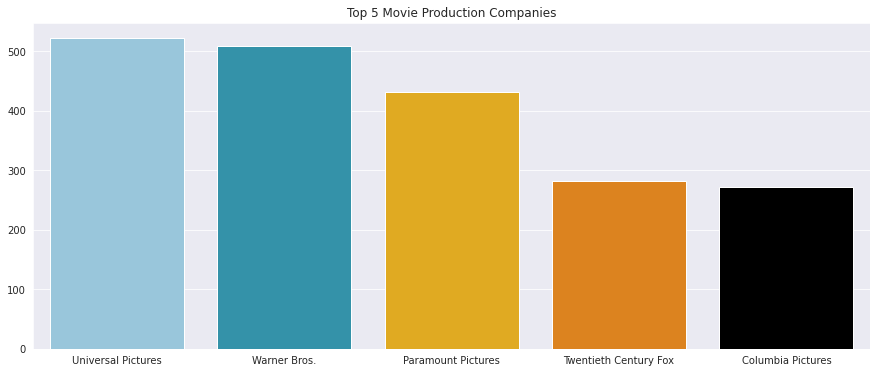

In [24]:
# x-axis plot
x_values = ["Universal Pictures","Warner Bros.","Paramount Pictures","Twentieth Century Fox","Columbia Pictures"]
x_axis = prod_companies[:5]

#y-axis plot
y=x_axis.values

#bars color pallette
colors=("#8ecae6","#219ebc","#ffb703","#fb8500","#000000")

#bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Production Companies')
plt.show()

Answer: **Universal pictures** had the highest movie productions with a count of 522 movies followed by Warner Bros. with 509

---

### Research Question 4: Which Director directed the most movies?

In [25]:
#get the individual movies directors have directed
def directors_count(x):
          #concatenate movie directors into one string
    directors =df['director'].str.cat(sep='|')

          #breakdown the directors string into single rows
    movie_directors =pd.Series(directors.split('|'))
    #get the count of movie directions by a director
    movie_directors =movie_directors.value_counts(ascending=False)

    return(movie_directors)

In [26]:
#count of movies directed by each director
dir_count= directors_count(df)
dir_count

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23
                    ..
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Simon Hunter         1
Harold P. Warren     1
Length: 5362, dtype: int64

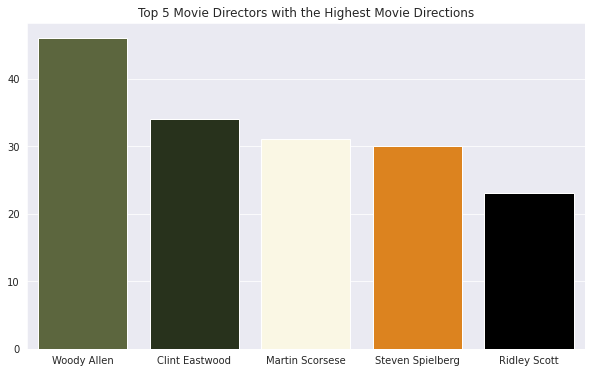

In [27]:
# Graph Representation of the top 5 movie directors
# x-axix plot
x_values = ["Woody Allen","Clint Eastwood","Martin Scorsese","Steven Spielberg","Ridley Scott"]
x_axis = dir_count[:5]

#y-axis plot
y=x_axis.values

#bar color pallette
colors=("#606c38","#283618","#fefae0","#fb8500","#000000")

#bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Directors with the Highest Movie Directions')
plt.show()

Answer: <b>Woody Allen Directed most movies with a count of 46 movies</b>

---


### Research Question 5: Who was the most Casted Actor?

In [28]:
#get the number of times an actor was casted
def Cast_count(x):
          
    cast =df['cast'].str.cat(sep='|')
    movie_cast =pd.Series(cast.split('|'))
    movie_cast=movie_cast.value_counts(ascending=False)
    return(movie_cast)
  

In [29]:
actors = Cast_count(df)
actors

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Andy Milonakis        1
Samantha Cope         1
Cynthia Watros        1
Satya Bhabha          1
Stephanie Nielson     1
Length: 19026, dtype: int64

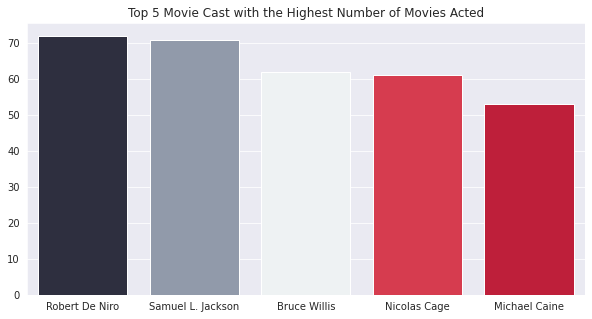

In [30]:
#x and y values for the graph
x_values = ["Robert De Niro","Samuel L. Jackson","Bruce Willis","Nicolas Cage","Michael Caine"]
x_axis = actors[:5]

y=x_axis.values
#colors  for the bars
colors=("#2b2d42","#8d99ae","#edf2f4","#ef233c","#d90429")

#plot
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Cast with the Highest Number of Movies Acted')
plt.show()

Answer: **Robert De Niro** was the most casted actor follwed closely by Samuel L.Jackson both with over 70 movies

---



### Research Question 6: Which month had the highest movie releases?

In [31]:
#get month name from the date column and count movies released by month
print(df['release_date'].dt.month_name().value_counts(ascending=False))

September    1331
October      1153
December      985
January       919
August        918
June          827
March         823
November      814
May           809
July          799
April         797
February      691
Name: release_date, dtype: int64


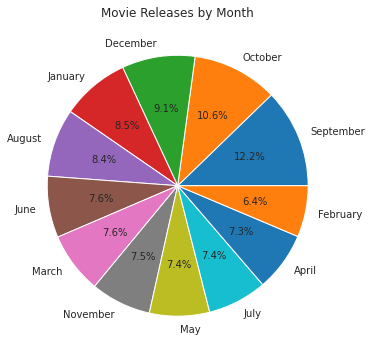

In [48]:
monthly_percentage = (df['release_date'].dt.month_name().value_counts(ascending=False))*100/len(df)
#explode = (0.1,0.0)

_, ax = plt.subplots(figsize=(10,6))
ax = monthly_percentage \
.plot(kind='pie', autopct='%.1f%%')
ax.set_title("Movie Releases by Month")
ax.set_ylabel('')
plt.show()

Answer: Most movies were released in the month of September

---

In [33]:
#drop categorical values to reduce the dataset
df1=df.drop(['cast','director','release_date','genres','production_companies'], axis=1)
df1.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,2015,174799923.1,1.385749e+09


In [34]:
#check for null values
df1.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

### Research Question 7: Does a Movies' Popularity affects its revenue?

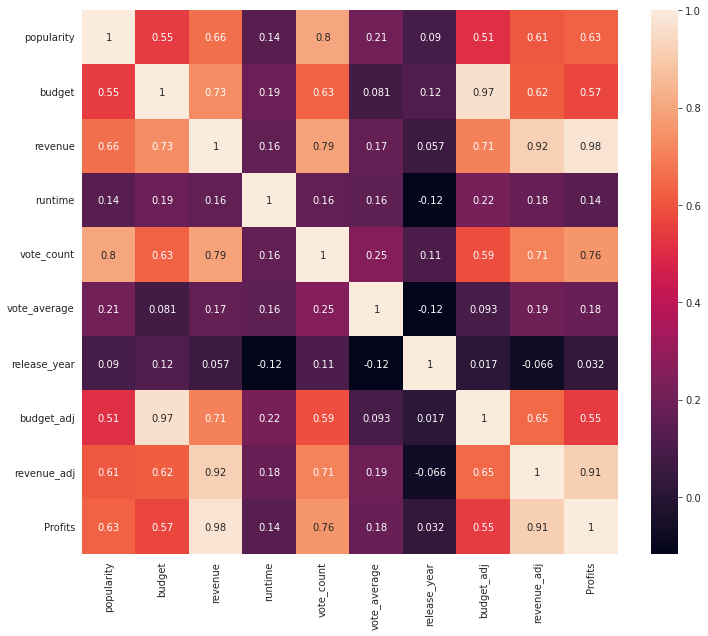

In [51]:
#correlation between features
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(), annot =True)

Answer: Yes, since there is a high correlation between revenue and popularity and also the vote_count

---

**Other Features correlation observation**
*   Popularity has a high corrrelationwith vote_count, revenue
*   budget: has a high corrrelation with budget_adj and revenue
*   runtime has a low correlation with most of the features
*   vote_count has a high correlation with revenue_adj,revenue and popularity
*   vote_average has a low correlation with all other features
*   release_year has a low correlation with all other features
*   budget_adj has a high corelation with budget_adj,revenue_adj,budget,revenue
*   revenue_adj has a high corelation with budget_adj,vote_count,budget,revenue












### Research Question 8: Which decade had the most movie releases?

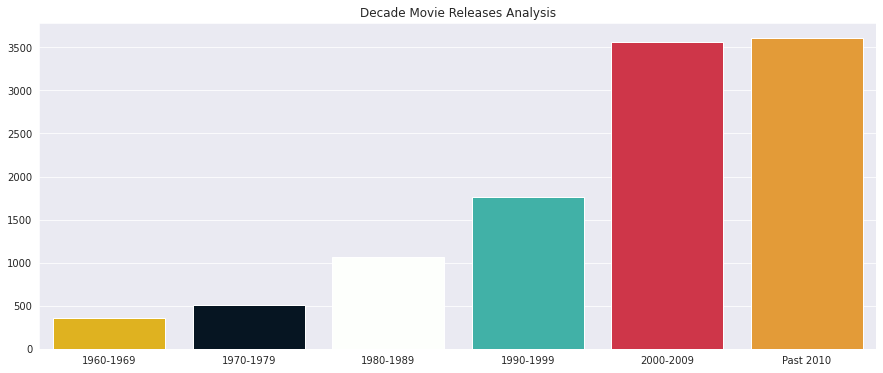

In [36]:
#get the decades
the_sixties = df1.release_year[(df1.release_year>= 1960) & (df1.release_year <= 1969)]
the_seventies = df1.release_year[(df1.release_year>= 1970) & (df1.release_year <= 1979)]
the_eighties = df1.release_year[(df1.release_year>= 1980) & (df1.release_year <= 1989)]
the_nineties = df1.release_year[(df1.release_year>= 1990) & (df1.release_year <= 1999)]
two_thousands = df1.release_year[(df1.release_year >=2000) & (df1.release_year <= 2009)]
past_2010 = df.release_year[df.release_year >= 2010]

#set the x and y values
x_values= ["1960-1969","1970-1979","1980-1989","1990-1999","2000-2009", "Past 2010"]
y = [the_sixties.count(),the_seventies.count(),len(the_eighties.values),len(the_nineties.values),len(two_thousands.values),len(past_2010.values)]
colors=("#ffc300","#011627","#fdfffc","#2ec4b6","#e71d36","#ff9f1c")

#plot the graph
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Decade Movie Releases Analysis')
plt.show()

Answer:The two thousand decade had the most movie releases<br/>
observation:  Movie releases increased by decade and also increased rapidly by the 2000s decade

---

###Research Question 9: Did most movies have higher ratings and votes?

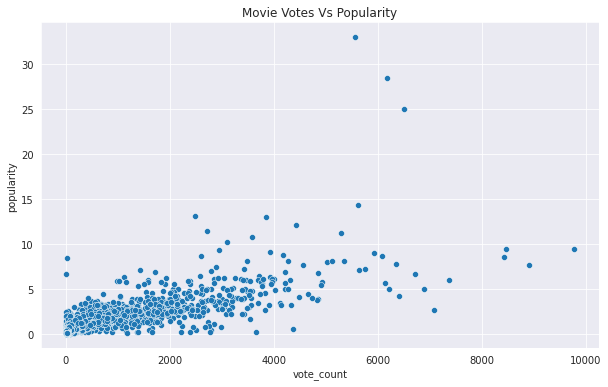

In [50]:
#votes and popularity  comparison
plt.figure(figsize= (10,6))
sns.scatterplot(x=df1['vote_count'],y=df1['popularity']).set_title('Movie Votes Vs Popularity')
plt.show()

<b>Answer : Most movies got lower votes and thus lower popularity/ratings</b><br/>
Observation: Movies with lower vote count were less popular compared to movies with high vote count

---

###Research Question 10:What was the highest profits made?

In [38]:
# create the profits column that shows the movie profits
df1=df1.assign(Profits=lambda x: x.revenue - x.budget)
df1.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profits
0,32.985763,150000000,1513528810,124,5562,6.5,2015,137999939.3,1.392446e+09,1363528810
1,28.419936,150000000,378436354,120,6185,7.1,2015,137999939.3,3.481613e+08,228436354
2,13.112507,110000000,295238201,119,2480,6.3,2015,101199955.5,2.716190e+08,185238201
3,11.173104,200000000,2068178225,136,5292,7.5,2015,183999919.0,1.902723e+09,1868178225
4,9.335014,190000000,1506249360,137,2947,7.3,2015,174799923.1,1.385749e+09,1316249360


In [39]:
df1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profits
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,2.519762e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,9.658799e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,9.083358e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


Answer: Max profits made on movies production was $2,544,506,000


---



<a id='conclusions'></a>
## Conclusions
In conclusion, from the analysis the following was determined:
<ul>
  <li> Most movies were produced in the Two thousands while there was lesser releases in the sixties and seventies</li>
  <li> Universal Pictures  production company produced most movies</li>
  <li> Movies with less vote count were less popular compared to movies with higher votes</li>
  <li> A movie's runtime does not affect its popularity or revenue</li>
  <li> The month of September had the most movie releases  and there was no month without a movie release</li>
  <li> Dramas were the most popular genres</li>
  
  </ul>

*challenges encountered with exploration**
  <li>unable to determine if the movie genre, directors, production company or cast determined a movie's popularity or revenue generation because of how the data was represented</li>